In [1]:
# Import necessary packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


In [2]:
df = pd.read_csv(r'C:\Users\ssamymuthux063973\Downloads\AAPL.csv')

In [3]:
df.set_index('Date', inplace=True)
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-28,204.100006,205.720001,203.320007,205.529999,205.529999,15938800
2019-08-29,208.500000,209.320007,206.660004,209.009995,209.009995,20990500
2019-08-30,210.160004,210.449997,207.199997,208.740005,208.740005,21143400
2019-09-03,206.429993,206.979996,204.220001,205.699997,205.699997,20023000
2019-09-04,208.389999,208.729996,207.320007,207.809998,207.809998,5453046


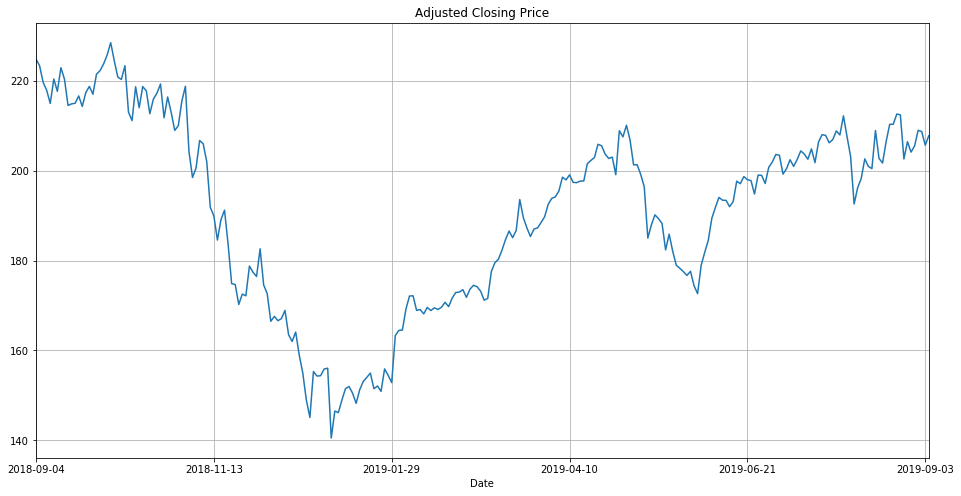

In [4]:
df['Adj Close'].plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price', grid=True)

In [5]:
window_size = 45 # Allow us to look at 45 days into the past
# Prepare the data so that we have 45 day windows and predict what the next day should be

# Get indices of access for the data
num_samples = len(df) - window_size
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window_size + 1).astype(np.int)

In [7]:
data = df['Adj Close'].values[indices] # Create the 2D matrix of training samples

In [8]:
X = data[:,:-1] # Each row represents 45 days in the past
y = data[:,-1] # Each output value represents the 46th day

In [9]:
# Train and test split
split_fraction = 0.8
ind_split = int(split_fraction * num_samples)
X_train = X[:ind_split]
y_train = y[:ind_split]
X_test = X[ind_split:]
y_test = y[ind_split:]

# Linear regression


In [10]:
#model
linear_reg = LinearRegression(n_jobs=-1)

#train
linear_reg.fit(X_train, y_train)

#predict
y_linear_pred_train = linear_reg.predict(X_train)
y_linear_pred = linear_reg.predict(X_test)

# Linear Training Data

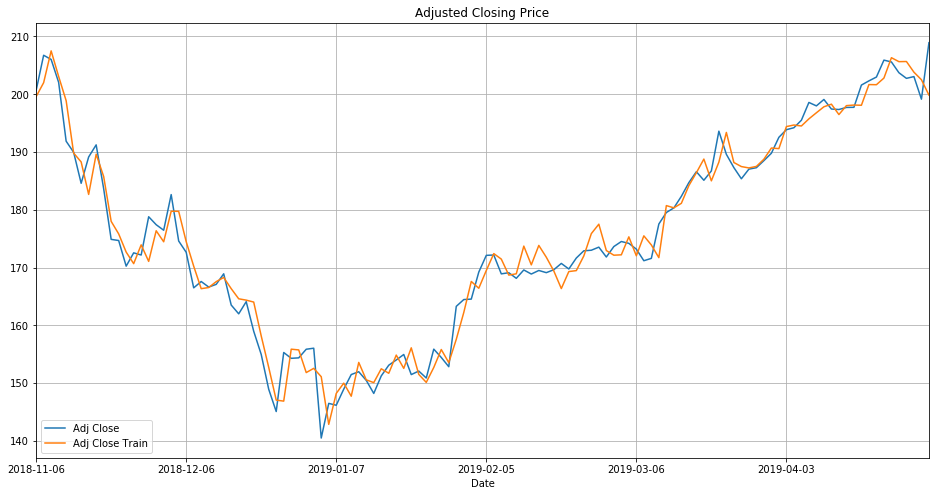

In [11]:
# Plot what it looks like for the training data
df_linear = df.copy()
df_linear.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_linear = df_linear.iloc[window_size:ind_split] # Past 45 days we don't know yet
df_linear['Adj Close Train'] = y_linear_pred_train[:-window_size]
df_linear.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price', grid=True)

# Linear test data 

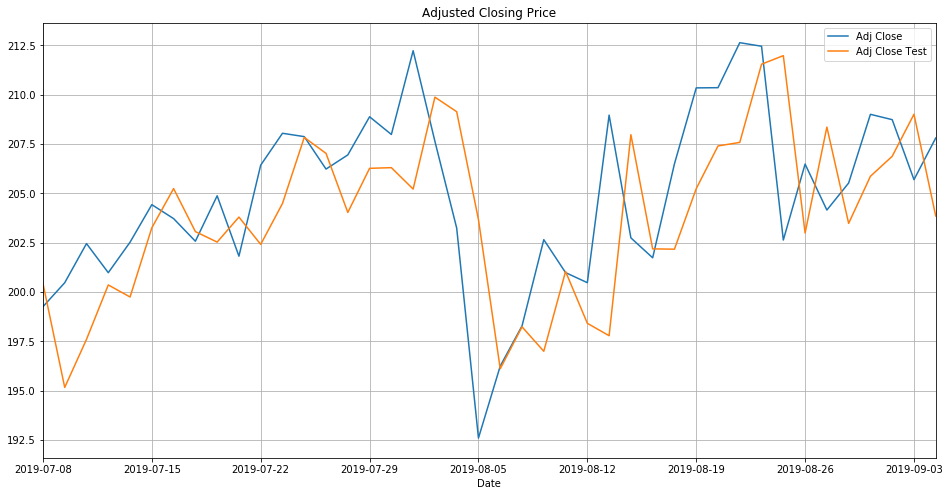

In [12]:
# Same for the test
df_linear = df.copy()
df_linear.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_linear = df_linear.iloc[ind_split+window_size:] # Past 45 days we don't know yet
df_linear['Adj Close Test'] = y_linear_pred
df_linear.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price', grid=True)

# Lasso Regeression

In [13]:
#Load model
lasso = Lasso(alpha=0.1)
#train
lasso.fit(X_train, y_train)

#Predict
y_pred_train_lasso = lasso.predict(X_train)
y_pred_lasso = lasso.predict(X_test)


# Lasso training data

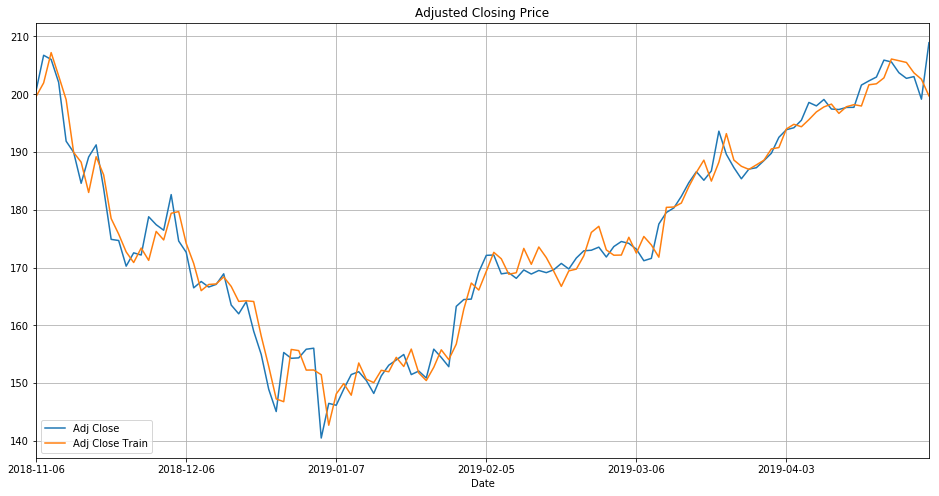

In [14]:
# Plot what it looks like for the training data
df_lasso = df.copy()
df_lasso.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_lasso = df_lasso.iloc[window_size:ind_split] # Past 45 days we don't know yet
df_lasso['Adj Close Train'] = y_pred_train_lasso[:-window_size]
df_lasso.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price', grid=True)

# Lasso test data

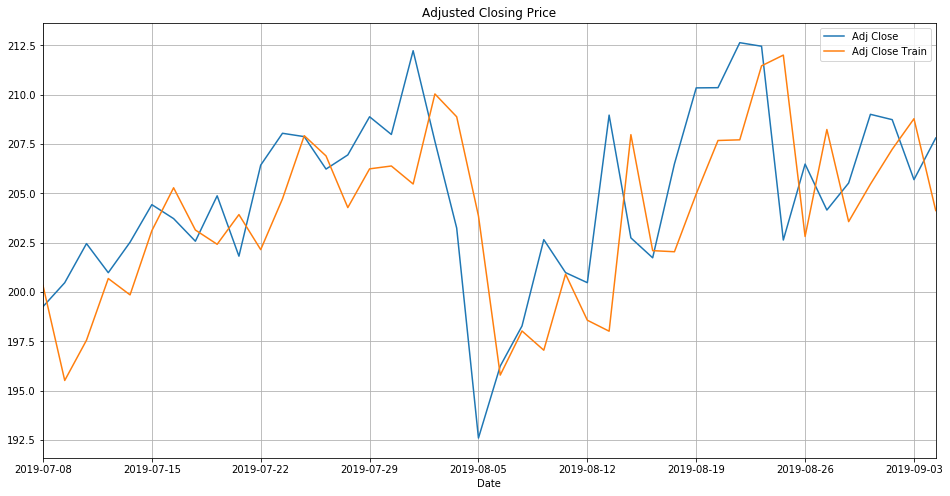

In [15]:
# Plot what it looks like for the training data
df_lasso = df.copy()
df_lasso.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_lasso = df_lasso.iloc[ind_split+window_size:] # Past 45 days we don't know yet
df_lasso['Adj Close Train'] = y_pred_lasso
df_lasso.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price', grid=True)

# Polynomial regression - Linear model Ridge

In [16]:
#Load the Model
model = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', Ridge(fit_intercept=False))])

# Train
model.fit(X_train, y_train)

#predict
y_pred_train_model = model.predict(X_train)
y_pred_model = model.predict(X_test)

In [17]:
poly_trained_data = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_train_model})
poly_trained_data.head(10)

,Actual,Predicted
0,200.656265,200.656264
1,206.741821,206.741821
2,206.020493,206.020492
3,202.048096,202.048095
4,191.870087,191.870086
5,189.953079,189.953078
6,184.587402,184.587401
7,189.142792,189.142791
8,191.237686,191.237686
9,183.658539,183.658539


# Polynomial - Train data

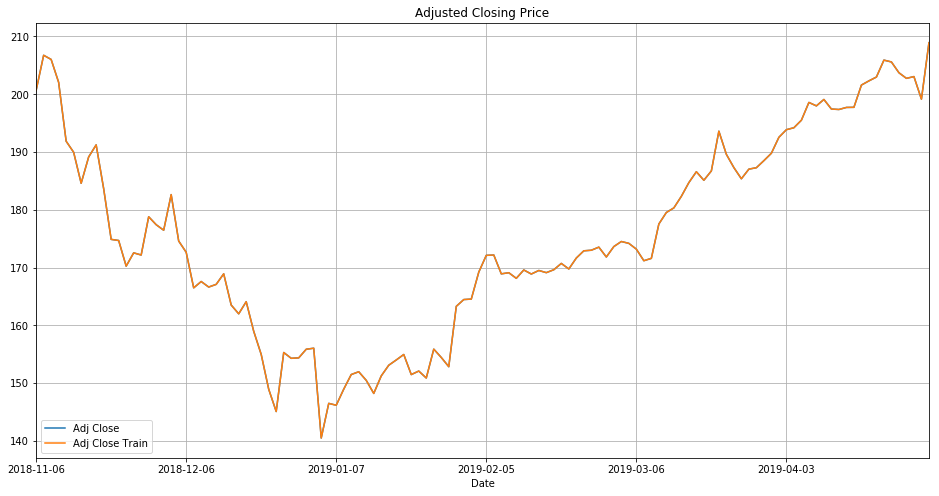

In [18]:
# Plot what it looks like for the training data
df_model = df.copy()
df_model.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_model = df_model.iloc[window_size:ind_split] # Past 45 days we don't know yet
df_model['Adj Close Train'] = y_pred_train_model[:-window_size]
df_model.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price', grid=True)

In [19]:
poly_test_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_model})
poly_test_data.head(10)

,Actual,Predicted
0,199.262909,256.205859
1,200.478302,273.054512
2,202.460754,248.943776
3,200.986359,253.157636
4,202.530502,269.789707
5,204.433273,288.692732
6,203.725952,291.436431
7,202.580307,263.543755
8,204.881561,243.578223
9,201.823181,243.911107


# Polynomial - Test data

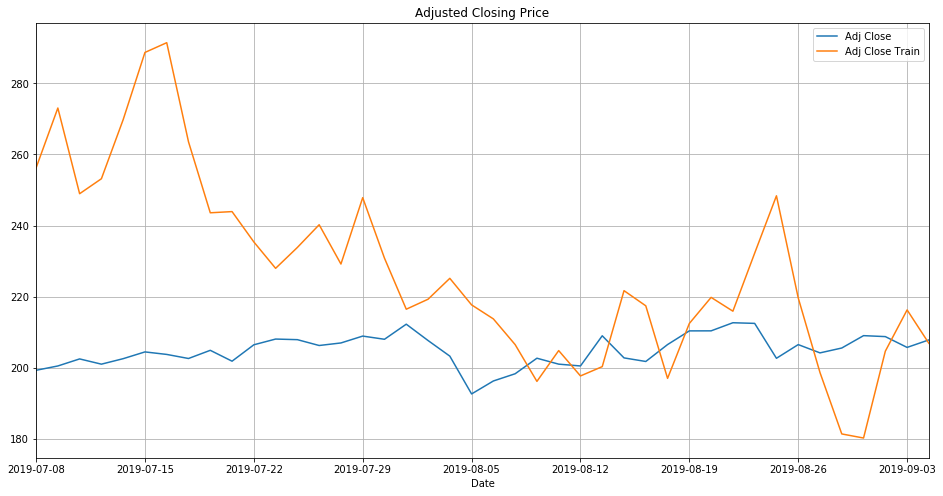

In [20]:
# Plot what it looks like for the training data
df_model = df.copy()
df_model.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_model = df_model.iloc[ind_split+window_size:] # Past 45 days we don't know yet
df_model['Adj Close Train'] = y_pred_model
df_model.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price', grid=True)

# Train Data of the Three model

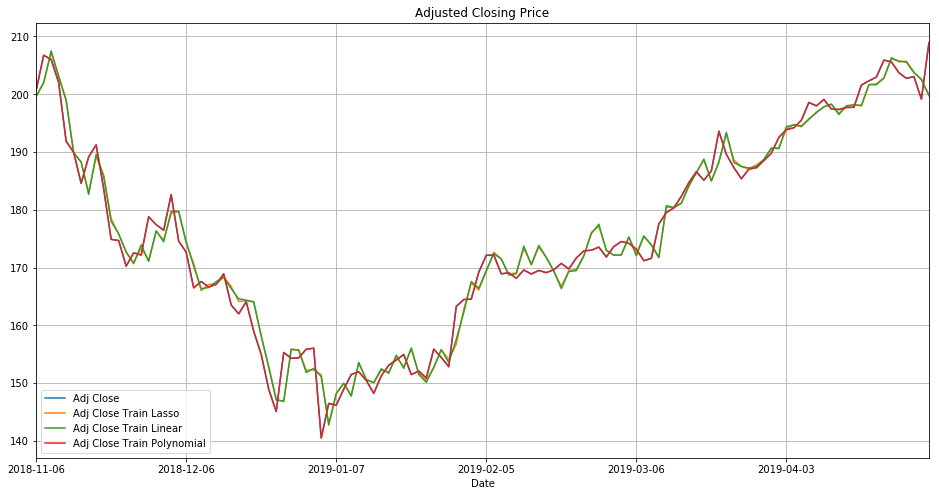

In [21]:
df_train = df.copy()
df_train.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_train = df_train.iloc[window_size:ind_split] # Past 45 days we don't know yet
# Add in all of our methods
df_train['Adj Close Train Lasso'] = y_pred_train_lasso[:-window_size]
df_train['Adj Close Train Linear'] = y_linear_pred_train[:-window_size]
df_train['Adj Close Train Polynomial'] = y_pred_train_model[:-window_size]
# Plot the data now
df_train.plot(label='AMAT', figsize=(16,8), title='Adjusted Closing Price', grid=True)

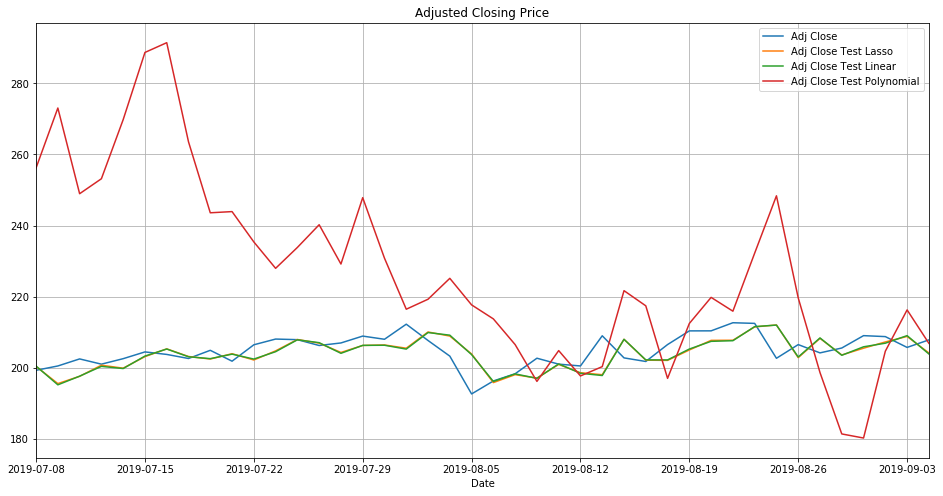

In [22]:
df_test = df.copy()
df_test.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_test = df_test.iloc[ind_split+window_size:] # Past 45 days we don't know yet
# Add in all of our methods
df_test['Adj Close Test Lasso'] = y_pred_lasso
df_test['Adj Close Test Linear'] = y_linear_pred
df_test['Adj Close Test Polynomial'] = y_pred_model
# Plot the data now
df_test.plot(label='AMAT', figsize=(16,8), title='Adjusted Closing Price', grid=True)

In [23]:
num_days = 45 # Let's try and forecase the next 45 days or two years

# Get the last window_size (45) days
data_seed = df['Adj Close'].values[-window_size:][None]

input_values = {"lasso": data_seed, "linear": data_seed, "poly": data_seed}
values = {"lasso": [], "linear": [], "poly": []}
for i in range(num_days): # For each day...
    # Predict the next price given the previous N prices
    values["lasso"].append(lasso.predict(input_values["lasso"])[0])
    values["linear"].append(linear_reg.predict(input_values["linear"])[0])
    values["poly"].append(linear_reg.predict(input_values["poly"])[0])
    # Dump the oldest price and put the newest price at the end
    for v in input_values:
        val = input_values[v]
        val = np.insert(val, -1, values[v][-1], axis=1)
        val = np.delete(val, 0, axis=1)
        input_values[v] = val.copy()

# Convert all to NumPy arrays
for v in input_values:
    values[v] = np.array(values[v])
    

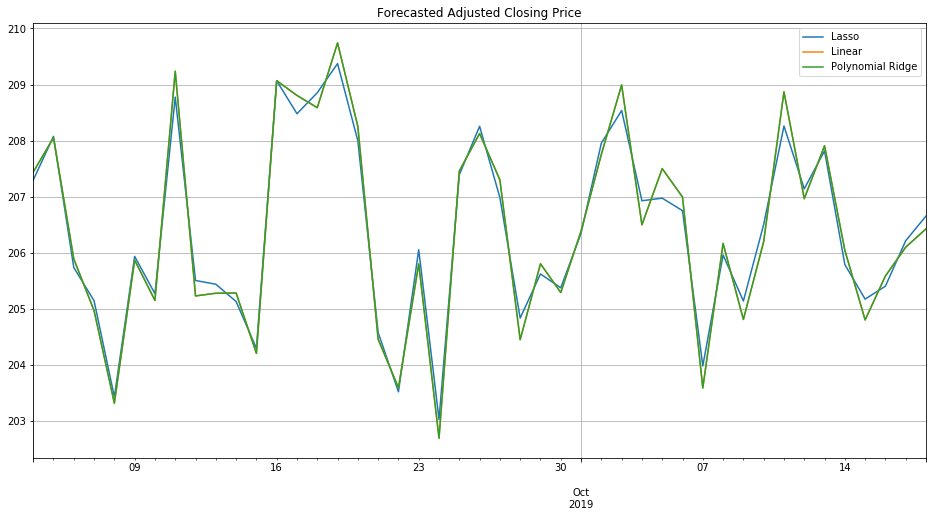

In [24]:
from datetime import timedelta, datetime
last_date = datetime.strptime(df.index[-1], '%Y-%m-%d')
df_forecast = pd.DataFrame()
df_forecast["Lasso"] = values["lasso"]
df_forecast["Linear"] = values["linear"]
df_forecast["Polynomial Ridge"] = values["poly"]
df_forecast.index = pd.date_range(start=last_date, periods=num_days)
df_forecast.plot(label='AAPL', figsize=(16,8), title='Forecasted Adjusted Closing Price', grid=True)
